In [ ]:

# install necessary dependencies
!pip install nltk
!pip install gensim

import nltk
import numpy as np
import pandas as pd

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Pre-processing

documents = ["The implementation of FEMA Whole Community initiative is an opportunity to engage the whole of societal capital in disaster management.",
             "Its policies are gradually being developed, questions are mounting about what implications this new strategy will have for the traditional intergovernmental management of disasters.",
             "As an emerging issue in disaster science and management, the following chapter examines what governance issues are likely to arise from the adoption of the Whole Community approach.",
             "An exchange between an academic and a practitioner provided unique perspectives, and a collaborative effort identified where there was agreement and where perspectives diverged.",
             "The academic segment reviewed the literature on key theoretical concepts, which define government legitimacy to engage in emergency management in the first place, identify boundaries of its mandate, and explain indicators that must be considered when evaluating a governance system.",
             "The academic segment concluded that increasing delegation of responsibilities for disaster management to partners in a widespread network poses significant challenges for government.",
             "Moving toward a Whole Community of shared responsibilities by extending networks even further and maintaining network relationships for goods and services that are largely not contract-based and thus not enforceable, government will be increasingly challenged to fulfill its commitment of good governance in terms of displaying maximum predictability, transparency, and accountability.",
             "Clarifications are needed on concrete Whole Community policies to analyze these challenges further and for research to make contributions to the ongoing policy discussions.",
             "The practitioner segment begins by discussing how the language of this new approach has been woven into federal emergency management doctrine.",
             "The ability of this language to actually affect shared responsibility is analyzed based on past similar programs, given that this segment concludes that the Whole Community approach has delivered nothing actionable that achieves devolution."]

#Cleaning
import re

def cleaning_text(text):
    # delete '
    pattern2 = ''
    text = re.sub(pattern2, '', text)    
    #delete ,
    pattern3 = ',' 
    text = re.sub(pattern3, '', text)
    return text
  

for text in documents:
    print(cleaning_text(text))

#Tokenize
def tokenize_text(text):
  text = re.sub('[.,]', '', text)
  return text.split()

for text in documents:
  text = cleaning_text(text)
  print(tokenize_text(text))

#Stemming and Lemmatize
from nltk.corpus import wordnet as wn # import lemmatize

def lemmatize_word(word):
    # make words lower  e.g., Python =>python
    word=word.lower()
    
    # lemmatize  e.g., cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
      return lemma

for text in documents:
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  print([lemmatize_word(word) for word in tokens])

#remove stop words

en_stop = nltk.corpus.stopwords.words('english')
print(en_stop)


def remove_stopwords(word, stopwordset):
  if word in stopwordset:
    return None
  else:
    return word

for text in documents:
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [lemmatize_word(word) for word in tokens]
  print([remove_stopwords(word, en_stop) for word in tokens])

def preprocessing_text(text):
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [lemmatize_word(word) for word in tokens]
  tokens = [remove_stopwords(word, en_stop) for word in tokens]
  tokens = [word for word in tokens if word is not None]
  return tokens


preprocessed_docs = [preprocessing_text(text) for text in documents]
preprocessed_docs



The implementation of FEMA Whole Community initiative is an opportunity to engage the whole of societal capital in disaster management.
Its policies are gradually being developed questions are mounting about what implications this new strategy will have for the traditional intergovernmental management of disasters.
As an emerging issue in disaster science and management the following chapter examines what governance issues are likely to arise from the adoption of the Whole Community approach.
An exchange between an academic and a practitioner provided unique perspectives and a collaborative effort identified where there was agreement and where perspectives diverged.
The academic segment reviewed the literature on key theoretical concepts which define government legitimacy to engage in emergency management in the first place identify boundaries of its mandate and explain indicators that must be considered when evaluating a governance system.
The academic segment concluded that increasin

[['implementation',
  'fema',
  'whole',
  'community',
  'initiative',
  'opportunity',
  'engage',
  'whole',
  'societal',
  'capital',
  'disaster',
  'management'],
 ['policy',
  'gradually',
  'develop',
  'question',
  'mounting',
  'implication',
  'new',
  'strategy',
  'traditional',
  'intergovernmental',
  'management',
  'disaster'],
 ['emerge',
  'issue',
  'disaster',
  'science',
  'management',
  'following',
  'chapter',
  'examine',
  'governance',
  'issue',
  'likely',
  'arise',
  'adoption',
  'whole',
  'community',
  'approach'],
 ['exchange',
  'academic',
  'practitioner',
  'provide',
  'unique',
  'perspective',
  'collaborative',
  'effort',
  'identify',
  'wa',
  'agreement',
  'perspective',
  'diverge'],
 ['academic',
  'segment',
  'review',
  'literature',
  'key',
  'theoretical',
  'concept',
  'define',
  'government',
  'legitimacy',
  'engage',
  'emergency',
  'management',
  'first',
  'place',
  'identify',
  'boundary',
  'mandate',
  'expla

Preporcessing the documents using Clearning, Tokenize, Stemming, and Remove stop words. We got 124 words for all documents.

In [ ]:
#Use the preprocessed documents
doc1 = set(['implementation','fema','whole','community','initiative','opportunity','engage','whole','societal','capital','disaster','management'])
doc2 = set(['policy','gradually','develop','question','mounting','implication','new','strategy','traditional','intergovernmental','management','disaster'])
doc3 = set(['emerge','issue','disaster','science','management','following','chapter','examine','governance','issue','likely','arise','adoption','whole','community','approach'])
doc4 = set(['exchange','academic','practitioner','provide','unique','perspective','collaborative','effort','identify','wa','agreement','perspective','diverge'])
doc5 = set(['academic','segment','review','literature','key','theoretical','concept','define','government','legitimacy','engage','emergency','management','first','place','identify','boundary','mandate','explain','indicator','must','consider','evaluate','governance','system'])
doc6 = set(['academic','segment','conclude','increase','delegation','responsibility','disaster','management','partner','widespread','network','pose','significant','challenge','government'])
doc7 = set(['move','toward','whole','community','share','responsibility','extend','network','even','maintain','network','relationship','good','services','largely','contract-based','thus','enforceable','government','increasingly','challenge','fulfill','commitment','good','governance','terms','display','maximum','predictability','transparency','accountability'])
doc8 = set(['clarification','need','concrete','whole','community','policy','analyze','challenge','research','make','contribution','ongoing','policy','discussion'])
doc9 = set(['practitioner','segment','begin','discuss','language','new','approach','ha','weave','federal','emergency','management','doctrine'])
doc10 = set(['ability','language','actually','affect','share','responsibility','analyze','base','past','similar','program','given','segment','conclude','whole','community','approach','ha','deliver','nothing','actionable','achieve','devolution'])
           

The first representation method is Bag-of-words. In this method, we represent the appearence of the words in the whole documents. Firstly, we need to convert the text documents in to a vector. Since we have 10 documents, then this method will count how many times each of the word appears. 

In [ ]:
#Using Bag-of-words Representation Method
def bow_vectorizer(docs):
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
        
  result_list = []
  for doc in docs:
    doc_vec = [0] * len(word2id)
    for w in doc:
      doc_vec[word2id[w]] += 1
    result_list.append(doc_vec)
  return result_list, word2id

bow_vec, word2id = bow_vectorizer(preprocessed_docs)
print(bow_vec)

word2id.items()

[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

dict_items([('implementation', 0), ('fema', 1), ('whole', 2), ('community', 3), ('initiative', 4), ('opportunity', 5), ('engage', 6), ('societal', 7), ('capital', 8), ('disaster', 9), ('management', 10), ('policy', 11), ('gradually', 12), ('develop', 13), ('question', 14), ('mounting', 15), ('implication', 16), ('new', 17), ('strategy', 18), ('traditional', 19), ('intergovernmental', 20), ('emerge', 21), ('issue', 22), ('science', 23), ('following', 24), ('chapter', 25), ('examine', 26), ('governance', 27), ('likely', 28), ('arise', 29), ('adoption', 30), ('approach', 31), ('exchange', 32), ('academic', 33), ('practitioner', 34), ('provide', 35), ('unique', 36), ('perspective', 37), ('collaborative', 38), ('effort', 39), ('identify', 40), ('wa', 41), ('agreement', 42), ('diverge', 43), ('segment', 44), ('review', 45), ('literature', 46), ('key', 47), ('theoretical', 48), ('concept', 49), ('define', 50), ('government', 51), ('legitimacy', 52), ('emergency', 53), ('first', 54), ('place',

From the result above, we can see that 
1. In doc1, the word "whole" appears the most which is twice
2. In doc2, the words "disaster", "management", "policy", "gradually", "develop", "question", "mounting", "implication", "new", "strategy", "traditional", "intergovernmental" appear the most which are once
3. In doc3, the word "issue" appears the most which is twice
4. In doc4, the word "perspective" appears the most which is twice
5. In doc5, the words "engage", "management", "governance", "academic", "identify", "segment", "review", "literature", "key", "theoretical", "concept", "define", "government", "legitimacy", "emergency", "first", "place", "boundary", "mandate", "explain", "indicator", "must", "consider", "evaluate", "system" appear the most which are once
6. In doc6, the words "disaster", "management", "academic", "segment", "government", "conclude", "increase", "delegation", "responsibility", "partner", "widespread", "network", "pose", "significant", "challenge" appear the most which are once
7. In doc7, the words "good" and "network" appear the most which are twice
8. In doc8, the word "policy" appears the most which is twice
9. In doc9, the words "management", "new", "approach", "practitioner", "segment", "emergency", "discuss", "language", "weave", "federal", "doctrine", "ability" appear the most which are once
10. In doc10, the words "whole", "community", "approach", "segment", "conclude", "responsibility", "share", "analyze", "language", "ability", "actually", "affect", "base", "past", "similar", "program", "given", "deliver", "nothing", "actionable", "achieve", "devolution" appear the most which are once

From all documents, we can see that the most appearance of the words are only twice in several documents and the words that appear once spread evenly in some documents. And we can see that the words "whole", "community", "disaster", and "management" are the words with the most frequent appearance in several documents. 

Consideration:
the words "whole", "community", "disaster", and "management" that the most frequent appearance among all documents indicate the most informative words that being discussed in the whole documents.

---



The second representation method is TF*IDF Vector. In this method, we calculate degree of importance of each word by scoring them. 
Firstly we calculate the frequency of the word (t) in the document (TF procedure) and then we do the inverse frequency of the word (t) in all documents and lastly (IDF procedure), we calculate the weight of each word.

      TF*IDF(t,d) = TF(t, d) * IDF(t)
      TF*IDF(t,d) = TF(t, d) * log (N/DFt)



In [ ]:
def tfidf_vectorizer(docs):
  def tf(word2id, doc):
    term_counts = np.zeros(len(word2id))
    for term in word2id.keys():
      term_counts[word2id[term]] = doc.count(term)
    tf_values = list(map(lambda x: x/sum(term_counts), term_counts))
    return tf_values
  
  def idf(word2id, docs):
    idf = np.zeros(len(word2id))
    for term in word2id.keys():
      idf[word2id[term]] = np.log(len(docs) / sum([bool(term in doc) for doc in docs]))
    return idf
  
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
  
  return [[_tf*_idf for _tf, _idf in zip(tf(word2id, doc), idf(word2id, docs))] for doc in docs], word2id

tfidf_vector, word2id = tfidf_vectorizer(preprocessed_docs)
print(tfidf_vector)
print(word2id.items())


[[0.19188209108283716, 0.19188209108283716, 0.11552453009332421, 0.057762265046662105, 0.19188209108283716, 0.19188209108283716, 0.134119826036175, 0.19188209108283716, 0.19188209108283716, 0.07635756098951292, 0.04256880198049923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07635756098951292, 0.04256880198049923, 0.134119826036175, 0.19188209108283716, 0.19188209108283716, 0.19188209108283716, 0.19188209108283716, 0.1918

From the result above, we can see that 
1. In doc1, the word "implementation", "whole", "initiative", "opportunity", "societal", and "capital" have the best score 0.19188209108283716
2. In doc2, the words "gradually", "develop", "question", "mounting", "implication", "strategy", "traditional", and "intergovernmental" have the best score 0.19188209108283716
3. In doc3, the word "issue" has the best score 0.28782313662425574
4. In doc4, the word "perspective" has the best score 0.35424386046062245
5. In doc5, the words "review", "literature", "key", "theoretical", "concept", "define", "legitimacy", "first", "place", "boundary", "mandate", "explain", "indicator", "must", "consider", "evaluate", "system" have the best score 0.09210340371976183
6. In doc6, the words "increase", "delegation", "partner", "widespread",  "pose", "significant"have the best score 0.15350567286626973
7. In doc7, the words "good" has the best score 0.1485538769673578
8. In doc8, the word "management" has the best score 0.22991970177630003
9. In doc9, the words "begin", "discuss", "weave", "federal" have the best score 0.17712193023031123
10. In doc10, the words "ability", "actually", "affect", "base", "past", "similar", "program", "given", "deliver", "nothing", "actionable", "achieve", "devolution" have the best score 0.1001123953475672

From all documents, we can see that three words that have the best score of all documents are perspective (0.35424386046062245), issue (0.28782313662425574), and management (0.22991970177630003)

Consideration:
the words with the best TF*IDF score indicate the most important words across the whole corpus

---



The first distance metric that I used is Jaccard Distance or also commonly known as intersection over union. This metric defines as size of intersection divided by size of union of two sets. The greater the proportion of intersections, the more similar the two documents.



In [ ]:
#Using Jaccard Index
def jaccard_similarity(doc1,doc2):
  # calculate the intersection
  num_intersection = len(set.intersection(doc1, doc2))
  # calculate the union
  num_union = len(set.union(doc1, doc2))
  # calculate the Jaccard index, return 1 if the set is empty
  try:
      return float(num_intersection) / num_union
  except ZeroDivisionError:
      return 1.0

print("Jaccard(doc1, doc2) = ", jaccard_similarity(doc1, doc2))
print("Jaccard(doc1, doc3) = ", jaccard_similarity(doc1, doc3))
print("Jaccard(doc1, doc4) = ", jaccard_similarity(doc1, doc4))
print("Jaccard(doc1, doc5) = ", jaccard_similarity(doc1, doc5))
print("Jaccard(doc1, doc6) = ", jaccard_similarity(doc1, doc6))
print("Jaccard(doc1, doc7) = ", jaccard_similarity(doc1, doc7))
print("Jaccard(doc1, doc8) = ", jaccard_similarity(doc1, doc8))
print("Jaccard(doc1, doc9) = ", jaccard_similarity(doc1, doc9))
print("Jaccard(doc1, doc10) = ", jaccard_similarity(doc1, doc10))

print("Jaccard(doc2, doc3) = ", jaccard_similarity(doc2, doc3))
print("Jaccard(doc2, doc4) = ", jaccard_similarity(doc2, doc4))
print("Jaccard(doc2, doc5) = ", jaccard_similarity(doc2, doc5))
print("Jaccard(doc2, doc6) = ", jaccard_similarity(doc2, doc6))
print("Jaccard(doc2, doc7) = ", jaccard_similarity(doc2, doc7))
print("Jaccard(doc2, doc8) = ", jaccard_similarity(doc2, doc8))
print("Jaccard(doc2, doc9) = ", jaccard_similarity(doc2, doc9))
print("Jaccard(doc2, doc10) = ", jaccard_similarity(doc2, doc10))

print("Jaccard(doc3, doc4) = ", jaccard_similarity(doc3, doc4))
print("Jaccard(doc3, doc5) = ", jaccard_similarity(doc3, doc5))
print("Jaccard(doc3, doc6) = ", jaccard_similarity(doc3, doc6))
print("Jaccard(doc3, doc7) = ", jaccard_similarity(doc3, doc7))
print("Jaccard(doc3, doc8) = ", jaccard_similarity(doc3, doc8))
print("Jaccard(doc3, doc9) = ", jaccard_similarity(doc3, doc9))
print("Jaccard(doc3, doc10) = ", jaccard_similarity(doc3, doc10))

print("Jaccard(doc4, doc5) = ", jaccard_similarity(doc4, doc5))
print("Jaccard(doc4, doc6) = ", jaccard_similarity(doc4, doc6))
print("Jaccard(doc4, doc7) = ", jaccard_similarity(doc4, doc7))
print("Jaccard(doc4, doc8) = ", jaccard_similarity(doc4, doc8))
print("Jaccard(doc4, doc9) = ", jaccard_similarity(doc4, doc9))
print("Jaccard(doc4, doc10) = ", jaccard_similarity(doc4, doc10))

print("Jaccard(doc5, doc6) = ", jaccard_similarity(doc5, doc6))
print("Jaccard(doc5, doc7) = ", jaccard_similarity(doc5, doc7))
print("Jaccard(doc5, doc8) = ", jaccard_similarity(doc5, doc8))
print("Jaccard(doc5, doc9) = ", jaccard_similarity(doc5, doc9))
print("Jaccard(doc5, doc10) = ", jaccard_similarity(doc5, doc10))

print("Jaccard(doc6, doc7) = ", jaccard_similarity(doc6, doc7))
print("Jaccard(doc6, doc8) = ", jaccard_similarity(doc6, doc8))
print("Jaccard(doc6, doc9) = ", jaccard_similarity(doc6, doc9))
print("Jaccard(doc6, doc10) = ", jaccard_similarity(doc6, doc10))

print("Jaccard(doc7, doc8) = ", jaccard_similarity(doc7, doc8))
print("Jaccard(doc7, doc9) = ", jaccard_similarity(doc7, doc9))
print("Jaccard(doc7, doc10) = ", jaccard_similarity(doc7, doc10))

print("Jaccard(doc8, doc9) = ", jaccard_similarity(doc8, doc9))
print("Jaccard(doc8, doc10) = ", jaccard_similarity(doc8, doc10))

print("Jaccard(doc9, doc10) = ", jaccard_similarity(doc9, doc10))

Jaccard(doc1, doc2) =  0.09523809523809523
Jaccard(doc1, doc3) =  0.18181818181818182
Jaccard(doc1, doc4) =  0.0
Jaccard(doc1, doc5) =  0.058823529411764705
Jaccard(doc1, doc6) =  0.08333333333333333
Jaccard(doc1, doc7) =  0.05263157894736842
Jaccard(doc1, doc8) =  0.09090909090909091
Jaccard(doc1, doc9) =  0.043478260869565216
Jaccard(doc1, doc10) =  0.0625
Jaccard(doc2, doc3) =  0.08
Jaccard(doc2, doc4) =  0.0
Jaccard(doc2, doc5) =  0.027777777777777776
Jaccard(doc2, doc6) =  0.08
Jaccard(doc2, doc7) =  0.0
Jaccard(doc2, doc8) =  0.041666666666666664
Jaccard(doc2, doc9) =  0.08695652173913043
Jaccard(doc2, doc10) =  0.0
Jaccard(doc3, doc4) =  0.0
Jaccard(doc3, doc5) =  0.05263157894736842
Jaccard(doc3, doc6) =  0.07142857142857142
Jaccard(doc3, doc7) =  0.07317073170731707
Jaccard(doc3, doc8) =  0.07692307692307693
Jaccard(doc3, doc9) =  0.07692307692307693
Jaccard(doc3, doc10) =  0.08571428571428572
Jaccard(doc4, doc5) =  0.05714285714285714
Jaccard(doc4, doc6) =  0.0384615384615384

From the result above, we can conclude that:
1. doc1 has the most similar to doc3
2. doc2 has the most similar to doc9
3. doc3 has the most similar to doc1
4. doc4 has the most similar to doc5
5. doc5 has the most similar to doc6
6. doc6 has the most similar to doc5
7. doc7 has the most similar to doc10
8. doc8 has the most similar to doc10
9. doc9 has the most similar to doc10
10. doc10 has the most similar to doc9

The similar documents are doc1 and doc3, because they have the best score of similarity based on Jaccard Similarity 0.18181818181818182

Consideration: if the length of the documents is large and even we get some same words then jaccard distance is not doing well.

---



The second distance metric that I used is Sørensen–Dice coefficient. This coefficient is not very different in form from the Jaccard index. Both are equivalent in the sense that given a value for the Sørensen–Dice coefficient S, one can calculate the respective Jaccard index value J and vice versa, using the equations J=S/(2-S) and S=2J/(1+J). 

The function ranges between zero and one, like Jaccard. In order to resolve the drawback of Jaccard Distance about the large document, Sørensen–Dice coefficient sets the denominator as the average value of the two sets.


In [ ]:
#using Sørensen–Dice coefficient
def dice_similarity(doc1, doc2):
  num_intersection =  len(set.intersection(doc1, doc2))
  sum_nums = len(doc1) + len(doc2)
  try:
    return 2 * num_intersection / sum_nums
  except ZeroDivisionError:
    return 1.0

print("Dice(doc1, doc2) = ", dice_similarity(doc1, doc2))
print("Dice(doc1, doc3) = ", dice_similarity(doc1, doc3))
print("Dice(doc1, doc4) = ", dice_similarity(doc1, doc4))
print("Dice(doc1, doc5) = ", dice_similarity(doc1, doc5))
print("Dice(doc1, doc6) = ", dice_similarity(doc1, doc6))
print("Dice(doc1, doc7) = ", dice_similarity(doc1, doc7))
print("Dice(doc1, doc8) = ", dice_similarity(doc1, doc8))
print("Dice(doc1, doc9) = ", dice_similarity(doc1, doc9))
print("Dice(doc1, doc10) = ", dice_similarity(doc1, doc10))

print("Dice(doc2, doc3) = ", dice_similarity(doc2, doc3))
print("Dice(doc2, doc4) = ", dice_similarity(doc2, doc4))
print("Dice(doc2, doc5) = ", dice_similarity(doc2, doc5))
print("Dice(doc2, doc6) = ", dice_similarity(doc2, doc6))
print("Dice(doc2, doc7) = ", dice_similarity(doc2, doc7))
print("Dice(doc2, doc8) = ", dice_similarity(doc2, doc8))
print("Dice(doc2, doc9) = ", dice_similarity(doc2, doc9))
print("Dice(doc2, doc10) = ", dice_similarity(doc2, doc10))

print("Dice(doc3, doc4) = ", dice_similarity(doc3, doc4))
print("Dice(doc3, doc5) = ", dice_similarity(doc3, doc5))
print("Dice(doc3, doc6) = ", dice_similarity(doc3, doc6))
print("Dice(doc3, doc7) = ", dice_similarity(doc3, doc7))
print("Dice(doc3, doc8) = ", dice_similarity(doc3, doc8))
print("Dice(doc3, doc9) = ", dice_similarity(doc3, doc9))
print("Dice(doc3, doc10) = ", dice_similarity(doc3, doc10))

print("Dice(doc4, doc5) = ", dice_similarity(doc4, doc5))
print("Dice(doc4, doc6) = ", dice_similarity(doc4, doc6))
print("Dice(doc4, doc7) = ", dice_similarity(doc4, doc7))
print("Dice(doc4, doc8) = ", dice_similarity(doc4, doc8))
print("Dice(doc4, doc9) = ", dice_similarity(doc4, doc9))
print("Dice(doc4, doc10) = ", dice_similarity(doc4, doc10))

print("Dice(doc5, doc6) = ", dice_similarity(doc5, doc6))
print("Dice(doc5, doc7) = ", dice_similarity(doc5, doc7))
print("Dice(doc5, doc8) = ", dice_similarity(doc5, doc8))
print("Dice(doc5, doc9) = ", dice_similarity(doc5, doc9))
print("Dice(doc5, doc10) = ", dice_similarity(doc5, doc10))

print("Dice(doc6, doc7) = ", dice_similarity(doc6, doc7))
print("Dice(doc6, doc8) = ", dice_similarity(doc6, doc8))
print("Dice(doc6, doc9) = ", dice_similarity(doc6, doc9))
print("Dice(doc6, doc10) = ", dice_similarity(doc6, doc10))

print("Dice(doc7, doc8) = ", dice_similarity(doc7, doc8))
print("Dice(doc7, doc9) = ", dice_similarity(doc7, doc9))
print("Dice(doc7, doc10) = ", dice_similarity(doc7, doc10))

print("Dice(doc8, doc9) = ", dice_similarity(doc8, doc9))
print("Dice(doc8, doc10) = ", dice_similarity(doc8, doc10))

print("Dice(doc9, doc10) = ", dice_similarity(doc9, doc10))

Dice(doc1, doc2) =  0.17391304347826086
Dice(doc1, doc3) =  0.3076923076923077
Dice(doc1, doc4) =  0.0
Dice(doc1, doc5) =  0.1111111111111111
Dice(doc1, doc6) =  0.15384615384615385
Dice(doc1, doc7) =  0.1
Dice(doc1, doc8) =  0.16666666666666666
Dice(doc1, doc9) =  0.08333333333333333
Dice(doc1, doc10) =  0.11764705882352941
Dice(doc2, doc3) =  0.14814814814814814
Dice(doc2, doc4) =  0.0
Dice(doc2, doc5) =  0.05405405405405406
Dice(doc2, doc6) =  0.14814814814814814
Dice(doc2, doc7) =  0.0
Dice(doc2, doc8) =  0.08
Dice(doc2, doc9) =  0.16
Dice(doc2, doc10) =  0.0
Dice(doc3, doc4) =  0.0
Dice(doc3, doc5) =  0.1
Dice(doc3, doc6) =  0.13333333333333333
Dice(doc3, doc7) =  0.13636363636363635
Dice(doc3, doc8) =  0.14285714285714285
Dice(doc3, doc9) =  0.14285714285714285
Dice(doc3, doc10) =  0.15789473684210525
Dice(doc4, doc5) =  0.10810810810810811
Dice(doc4, doc6) =  0.07407407407407407
Dice(doc4, doc7) =  0.0
Dice(doc4, doc8) =  0.0
Dice(doc4, doc9) =  0.08
Dice(doc4, doc10) =  0.0
Dic

From the result above, we can conclude that:
1. doc1 has the most similar to doc3
2. doc2 has the most similar to doc9
3. doc3 has the most similar to doc1
4. doc4 has the most similar to doc5
5. doc5 has the most similar to doc6
6. doc6 has the most similar to doc5
7. doc7 has the most similar to doc10
8. doc8 has the most similar to doc10
9. doc9 has the most similar to doc10
10. doc10 has the most similar to doc9

The similar documents are doc1 and doc3, because they have the best score of similarity based on Sørensen–Dice Similarity 0.3076923076923077

Consideration: 
The Sørensen–Dice coefficient is useful for ecological community data [1]. Justification for its use is primarily empirical rather than theoretical (although it can be justified theoretically as the intersection of two fuzzy sets[2]). As compared to Euclidean distance, the Sørensen distance retains sensitivity in more heterogeneous data sets and gives less weight to outliers.[3] Recently the Dice score (and its variations, e.g. logDice taking a logarithm of it) has become popular in computer lexicography for measuring the lexical association score of two given words.[4] It is also commonly used in image segmentation, in particular for comparing algorithm output against reference masks in medical applications.[5]

References:
1. Looman, J.; Campbell, J.B. (1960). "Adaptation of Sorensen's K (1948) for estimating unit affinities in prairie vegetation". Ecology. 41 (3): 409–416. doi:10.2307/1933315. JSTOR 1933315.
2. Roberts, D.W. (1986). "Ordination on the basis of fuzzy set theory". Vegetatio. 66 (3): 123–131. doi:10.1007/BF00039905
3.  McCune, Bruce & Grace, James (2002) Analysis of Ecological Communities. Mjm Software Design; ISBN 0-9721290-0-6
4.  Rychlý, P. (2008) A lexicographer-friendly association score. Proceedings of the Second Workshop on Recent Advances in Slavonic Natural Language Processing RASLAN 2008: 6–9
5. Zijdenbos, A.P.; Dawant, B.M.; Margolin, R.A.; Palmer, A.C. (1994). "Morphometric analysis of white matter lesions in MR images: method and validation". IEEE Transactions on Medical Imaging. Institute of Electrical and Electronics Engineers (IEEE). 13 (4): 716–724. doi:10.1109/42.363096

---



The third distance metric that I used is Szymkiewicz-Simpson coefficient or popular as overlap coefficient. This method is defined as the size of the union of set A and set B over the size of the smaller set between A and B. 

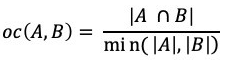



In [ ]:
#Using Szymkiewicz-Simpson coefficient

def simpson_similarity(list_a, list_b):
  num_intersection = len(set.intersection(set(list_a), set(list_b)))
  min_num = min(len(set(list_a)), len(set(list_b)))
  try:
    return num_intersection / min_num
  except ZeroDivisionError:
    if num_intersection == 0:
      return 1.0
    else:
      return 0

print("Simpson(doc1, doc2) = ", simpson_similarity(doc1, doc2))
print("Simpson(doc1, doc3) = ", simpson_similarity(doc1, doc3))
print("Simpson(doc1, doc4) = ", simpson_similarity(doc1, doc4))
print("Simpson(doc1, doc5) = ", simpson_similarity(doc1, doc5))
print("Simpson(doc1, doc6) = ", simpson_similarity(doc1, doc6))
print("Simpson(doc1, doc7) = ", simpson_similarity(doc1, doc7))
print("Simpson(doc1, doc8) = ", simpson_similarity(doc1, doc8))
print("Simpson(doc1, doc9) = ", simpson_similarity(doc1, doc9))
print("Simpson(doc1, doc10) = ", simpson_similarity(doc1, doc10))

print("Simpson(doc2, doc3) = ", simpson_similarity(doc2, doc3))
print("Simpson(doc2, doc4) = ", simpson_similarity(doc2, doc4))
print("Simpson(doc2, doc5) = ", simpson_similarity(doc2, doc5))
print("Simpson(doc2, doc6) = ", simpson_similarity(doc2, doc6))
print("Simpson(doc2, doc7) = ", simpson_similarity(doc2, doc7))
print("Simpson(doc2, doc8) = ", simpson_similarity(doc2, doc8))
print("Simpson(doc2, doc9) = ", simpson_similarity(doc2, doc9))
print("Simpson(doc2, doc10) = ", simpson_similarity(doc2, doc10))

print("Simpson(doc3, doc4) = ", simpson_similarity(doc3, doc4))
print("Simpson(doc3, doc5) = ", simpson_similarity(doc3, doc5))
print("Simpson(doc3, doc6) = ", simpson_similarity(doc3, doc6))
print("Simpson(doc3, doc7) = ", simpson_similarity(doc3, doc7))
print("Simpson(doc3, doc8) = ", simpson_similarity(doc3, doc8))
print("Simpson(doc3, doc9) = ", simpson_similarity(doc3, doc9))
print("Simpson(doc3, doc10) = ", simpson_similarity(doc3, doc10))

print("Simpson(doc4, doc5) = ", simpson_similarity(doc4, doc5))
print("Simpson(doc4, doc6) = ", simpson_similarity(doc4, doc6))
print("Simpson(doc4, doc7) = ", simpson_similarity(doc4, doc7))
print("Simpson(doc4, doc8) = ", simpson_similarity(doc4, doc8))
print("Simpson(doc4, doc9) = ", simpson_similarity(doc4, doc9))
print("Simpson(doc4, doc10) = ", simpson_similarity(doc4, doc10))

print("Simpson(doc5, doc6) = ", simpson_similarity(doc5, doc6))
print("Simpson(doc5, doc7) = ", simpson_similarity(doc5, doc7))
print("Simpson(doc5, doc8) = ", simpson_similarity(doc5, doc8))
print("Simpson(doc5, doc9) = ", simpson_similarity(doc5, doc9))
print("Simpson(doc5, doc10) = ", simpson_similarity(doc5, doc10))

print("Simpson(doc6, doc7) = ", simpson_similarity(doc6, doc7))
print("Simpson(doc6, doc8) = ", simpson_similarity(doc6, doc8))
print("Simpson(doc6, doc9) = ", simpson_similarity(doc6, doc9))
print("Simpson(doc6, doc10) = ", simpson_similarity(doc6, doc10))

print("Simpson(doc7, doc8) = ", simpson_similarity(doc7, doc8))
print("Simpson(doc7, doc9) = ", simpson_similarity(doc7, doc9))
print("Simpson(doc7, doc10) = ", simpson_similarity(doc7, doc10))

print("Simpson(doc8, doc9) = ", simpson_similarity(doc8, doc9))
print("Simpson(doc8, doc10) = ", simpson_similarity(doc8, doc10))

print("Simpson(doc9, doc10) = ", simpson_similarity(doc9, doc10))


Simpson(doc1, doc2) =  0.18181818181818182
Simpson(doc1, doc3) =  0.36363636363636365
Simpson(doc1, doc4) =  0.0
Simpson(doc1, doc5) =  0.18181818181818182
Simpson(doc1, doc6) =  0.18181818181818182
Simpson(doc1, doc7) =  0.18181818181818182
Simpson(doc1, doc8) =  0.18181818181818182
Simpson(doc1, doc9) =  0.09090909090909091
Simpson(doc1, doc10) =  0.18181818181818182
Simpson(doc2, doc3) =  0.16666666666666666
Simpson(doc2, doc4) =  0.0
Simpson(doc2, doc5) =  0.08333333333333333
Simpson(doc2, doc6) =  0.16666666666666666
Simpson(doc2, doc7) =  0.0
Simpson(doc2, doc8) =  0.08333333333333333
Simpson(doc2, doc9) =  0.16666666666666666
Simpson(doc2, doc10) =  0.0
Simpson(doc3, doc4) =  0.0
Simpson(doc3, doc5) =  0.13333333333333333
Simpson(doc3, doc6) =  0.13333333333333333
Simpson(doc3, doc7) =  0.2
Simpson(doc3, doc8) =  0.15384615384615385
Simpson(doc3, doc9) =  0.15384615384615385
Simpson(doc3, doc10) =  0.2
Simpson(doc4, doc5) =  0.16666666666666666
Simpson(doc4, doc6) =  0.083333333

From the result above, we can conclude that:
1. doc1 has the most similar to doc3
2. doc2 has the most similar to doc3, doc6, and doc9
3. doc3 has the most similar to doc1
4. doc4 has the most similar to doc5
5. doc5 has the most similar to doc6
6. doc6 has the most similar to doc5 and doc7
7. doc7 has the most similar to doc6
8. doc8 has the most similar to doc10
9. doc9 has the most similar to doc10
10. doc10 has the most similar to doc9

The similar documents are doc1 and doc3, because they have the best score of similarity based on Szymkiewicz-Simpson Similarity 0.36363636363636365

Consideration: 
Overlap Coefficient can provide better insight into how similar two documents, how similar the document of neighbors are. By knowing the sizes of each document, an analyst can easily know if one document is a proper subset (full contained) in the other document.